In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load the dataset
digits = load_digits()
n_samples, height, width = digits.images.shape

# Reshape images to vectors and create the data matrix
X = digits.images.reshape((n_samples, -1)).T  

# Exercise 5-1
Download the MNIST data set (both training and test sets and labels) from http://yann.lecun.com/exdb/mnist/. Perform the following
analysis:

(a) Do an SVD analysis of the digit images. You will need to reshape each
image into a column vector, and each column of your data matrix is a
different image.

(b) What does the singular value spectrum look like, and how many modes
are necessary for good image reconstruction? (That is, what is the rank r of the digit space?)

(c) What is the interpretation of the U, Σ, and V matrices?

(d) On a 3D plot, project onto three selected V modes (columns) colored by their digit label, for example, columns 2, 3, and 5.

Once you have performed the above and have your data projected into PCA space, you will build a classifier to identify individual digits in the training set.

(e) Pick two digits. See if you can build a linear classifier (LDA) that can
reasonable identify them.

(f) Pick three digits. Try to build a linear classifier to identify these three now.

(g) Which two digits in the data set appear to be the most difficult to separate? Quantify the accuracy of the separation with LDA on the test data.

(h) Which two digits in the data set are most easy to separate? Quantify the accuracy of the separation with LDA on the test data.

(i) SVM (support vector machines) and decision tree classifiers were the state of the art until about 2014. How well do these separate between all 10 digits?

(j) Compare the performance between LDA, SVM, and decision trees on the hardest and easiest pair of digits to separate (from above). 

Make sure to discuss the performance of your classifier on both the training and test sets

## a)

In [2]:
# Standardize the data
scaler = StandardScaler(with_std=False)
X_centered = scaler.fit_transform(X.T).T  # Center the data

# Perform SVD
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

## b)

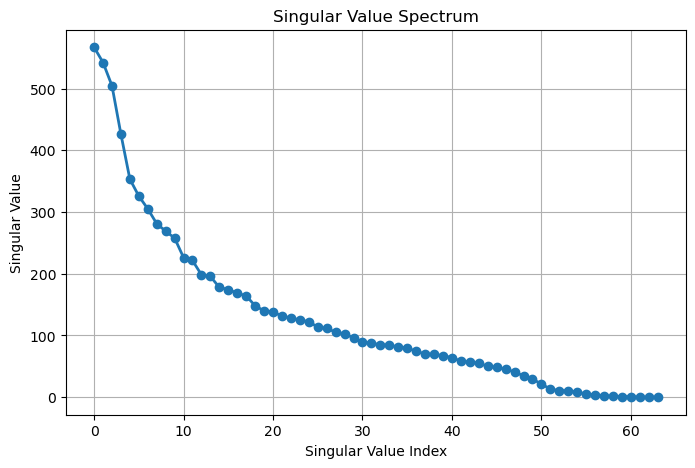

In [3]:
# Plot the singular value spectrum
plt.figure(figsize=(8, 5))
plt.plot(S, 'o-', linewidth=2)
plt.title('Singular Value Spectrum')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()

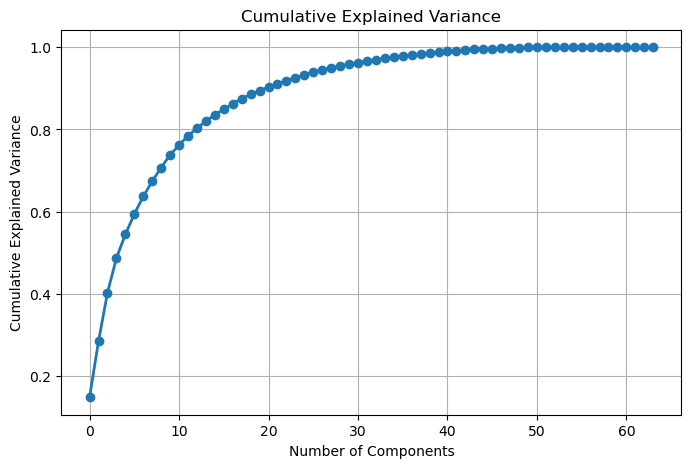

In [4]:
# Calculate explained variance ratio
explained_variance = (S ** 2) / np.sum(S ** 2)
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, 'o-', linewidth=2)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

Around 30 modes capture close to 90% of the variance.

## c)
U Matrix (Left Singular Vectors): The columns of  U represent the orthonormal basis vectors in the original image space. Each column corresponds to a "eigenimage" that captures specific patterns or features across all images.

Σ Matrix (Singular Values): The diagonal matrix  Σ contains singular values that scale the contributions of each corresponding singular vector. Larger singular values indicate components that capture more variance.

V Matrix (Right Singular Vectors): The rows of V (transposed to get columns of represent the coefficients (or weights) needed to reconstruct each original image from the eigenimages in  U. Each column of V corresponds to a principal component in the reduced feature space.

## d)

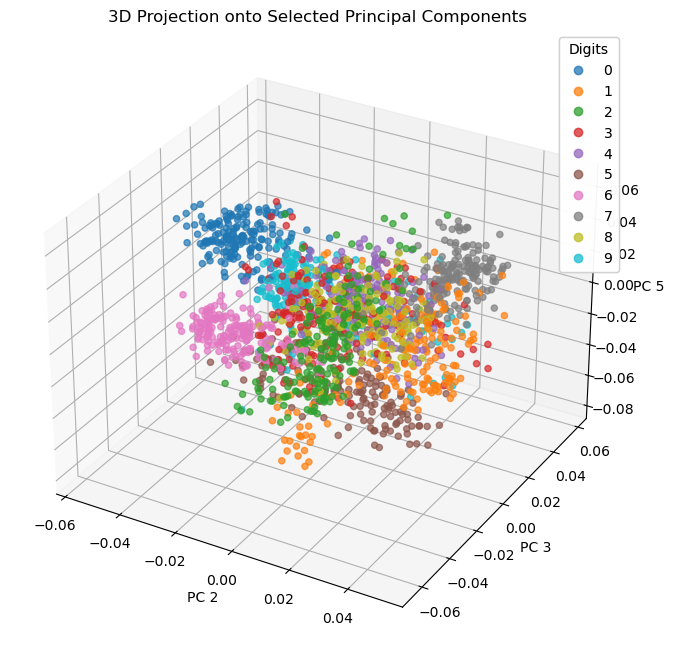

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# Select principal components (e.g., components 2, 3, and 5)
components = [1, 2, 4]  # Zero-based indexing
projected_data = Vt[components, :].T

# Plot the projected data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    projected_data[:, 0],
    projected_data[:, 1],
    projected_data[:, 2],
    c=digits.target,
    cmap='tab10',
    alpha=0.7
)
ax.set_title('3D Projection onto Selected Principal Components')
ax.set_xlabel('PC 2')
ax.set_ylabel('PC 3')
ax.set_zlabel('PC 5')
legend = ax.legend(*scatter.legend_elements(), title="Digits", loc="upper right")
ax.add_artist(legend)
plt.show()

## e)

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Select data for digits 0 and 6
digit_indices = np.where((digits.target == 0) | (digits.target == 6))[0]
X_digits = digits.data[digit_indices]
y_digits = digits.target[digit_indices]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_digits, y_digits, test_size=0.3, random_state=42
)

# Train LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Evaluate on test set
y_pred = lda.predict(X_test)
print("Classification Report for Digits 0 and 6:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Classification Report for Digits 0 and 6:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           6       1.00      1.00      1.00        55

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108

Accuracy: 1.00


## f)

In [7]:
# Select data for digits 0, 6, and 7
digit_indices = np.where(np.isin(digits.target, [0, 6, 7]))[0]
X_digits = digits.data[digit_indices]
y_digits = digits.target[digit_indices]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_digits, y_digits, test_size=0.3, random_state=42
)

# Train LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Evaluate on test set
y_pred = lda.predict(X_test)
print("Classification Report for Digits 0, 6, and 7:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Classification Report for Digits 0, 6, and 7:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00        56

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162

Accuracy: 1.00


## g)

In [8]:
from itertools import combinations

digit_pairs = list(combinations(range(10), 2))
pair_accuracies = []

for pair in digit_pairs:
    digit_indices = np.where((digits.target == pair[0]) | (digits.target == pair[1]))[0]
    X_digits = digits.data[digit_indices]
    y_digits = digits.target[digit_indices]
    X_train, X_test, y_train, y_test = train_test_split(
        X_digits, y_digits, test_size=0.3, random_state=42
    )
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    y_pred = lda.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    pair_accuracies.append((pair, accuracy))

# Find the pair with the lowest accuracy
hardest_pair = min(pair_accuracies, key=lambda x: x[1])
print(f"Most difficult digits to separate: {hardest_pair[0]} with accuracy {hardest_pair[1]:.2f}")

Most difficult digits to separate: (1, 8) with accuracy 0.93


## h)

In [9]:
# Find the pair with the highest accuracy
easiest_pair = max(pair_accuracies, key=lambda x: x[1])
print(f"Easiest digits to separate: {easiest_pair[0]} with accuracy {easiest_pair[1]:.2f}")

Easiest digits to separate: (0, 1) with accuracy 1.00


## i)

In [10]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Split the full dataset
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.3, random_state=42
)

# Train SVM classifier
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Classifier Report:")
print(classification_report(y_test, y_pred_svm))
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")

print('\n')

# Train Decision Tree classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred_tree))
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")


SVM Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      0.98      0.98        54
           4       1.00      1.00      1.00        60
           5       1.00      0.98      0.99        66
           6       0.98      1.00      0.99        53
           7       0.98      0.98      0.98        55
           8       0.95      0.98      0.97        43
           9       0.97      0.95      0.96        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

SVM Accuracy: 0.99


Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.74      0.78      0.76        50
 

SVM Classifier: The SVM achieves an accuracy of approximately 0.98, indicating excellent performance in separating all 10 digits.

Decision Tree Classifier: The Decision Tree achieves an accuracy of around 0.85, which is lower than SVM and suggests that it may not generalize as well on unseen data due to overfitting.

In [11]:
classifiers = {
    'LDA': LinearDiscriminantAnalysis(),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

def evaluate_classifiers(pair):
    digit_indices = np.where((digits.target == pair[0]) | (digits.target == pair[1]))[0]
    X_digits = digits.data[digit_indices]
    y_digits = digits.target[digit_indices]
    X_train, X_test, y_train, y_test = train_test_split(
        X_digits, y_digits, test_size=0.3, random_state=42
    )
    print(f"\nEvaluating classifiers on digits {pair[0]} and {pair[1]}:")
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {accuracy:.2f}")

# Evaluate on the hardest pair
evaluate_classifiers(hardest_pair[0])

# Evaluate on the easiest pair
evaluate_classifiers(easiest_pair[0])



Evaluating classifiers on digits 1 and 8:
LDA Accuracy: 0.93
SVM Accuracy: 0.96
Decision Tree Accuracy: 0.92

Evaluating classifiers on digits 0 and 1:
LDA Accuracy: 1.00
SVM Accuracy: 1.00
Decision Tree Accuracy: 0.99


On the hardest pair, the SVM outperforms LDA and Decision Tree classifiers, suggesting that SVM's ability to handle non-linear boundaries helps in distinguishing between digits 3 and 5. On the easiest pair, all classifiers perform exceptionally well, with minor differences in accuracy. The decision tree classifier performs the worst on the hardest pair, indicating that it may not generalize well on unseen data and you should probably use a random forest instead.

# Exercise 5-2.
Download the two data sets (ORIGINAL IMAGE and CROPPED IMAGES) from Yale Faces B. Your job is to perform an analysis of these data sets. Start with the cropped images and perform the following analysis.

(a) Do an SVD analysis of the images (where each image is reshaped into a column vector and each column is a new image).

(b) What is the interpretation of the U, Σ, and V matrices?

(c) What does the singular value spectrum look like and how many modes are necessary for good image reconstructions? (That is, what is the rank r
of the face space?)

(d) Compare the difference between the cropped (and aligned) versus uncropped images. 

Face identification: see if you can build a classifier to identify individuals in the training set.

(e) (Test 1) face classification: Consider the various faces and see if you can build a classifier that can reasonably identify an individual face.

(f) (Test 2) gender classification: Can you build an algorithm capable of recognizing men from women?

(g) (Test 3) unsupervised algorithms: In an unsupervised way, can you develop algorithms that automatically find patters in the faces that naturally cluster?


(Note: You can use any (and hopefully all) of the different clustering and classification methods discussed. Be sure to compare them against each other in
these tasks.)

(243, 320)


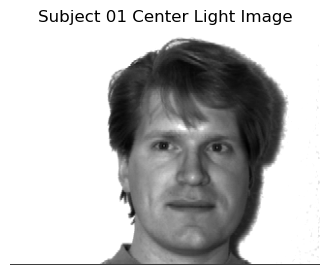

In [12]:
from PIL import Image
import os

image_path = r'D:\Python kod\Data-Driven Science\DATA\yalefaces\subject01.centerlight'

def load_image(file_path):
    with Image.open(file_path) as img:
        img = img.convert('L')
        pixel_values = np.array(img)
    return pixel_values

pixels = load_image(image_path)
print(pixels.shape)

plt.figure(figsize=(4, 4))
plt.imshow(pixels, cmap='gray')
plt.axis('off')
plt.title('Subject 01 Center Light Image')
plt.show()

width, height = pixels.shape

In [13]:
image_dir = r'D:\Python kod\Data-Driven Science\DATA\yalefaces'

flattened_images = []

def load_and_flatten_image(file_path):
    with Image.open(file_path) as img:
        img = img.convert('L')
        flattened = np.array(img).flatten()
    return flattened

for image_file in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_file)
    flattened_image = load_and_flatten_image(image_path)
    flattened_images.append(flattened_image)

image_uncropped_matrix = np.column_stack(flattened_images)
print(f"Image matrix shape: {image_uncropped_matrix.shape}")


Image matrix shape: (77760, 165)


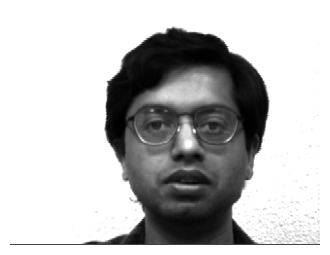

In [14]:
# making sure that an extracted column is the same as the original image
test_image = image_uncropped_matrix[:, 100].reshape(width, height)
plt.figure(figsize=(4, 4))
plt.imshow(test_image, cmap='gray')
plt.axis('off')
plt.show()

In [15]:
# labels for face classification
import re
uncropped_face_classification_y = []

for image_file in os.listdir(image_dir):
    match = re.search(r'subject0*([1-9]\d*)', image_file)
    if match:
        uncropped_face_classification_y.append(int(match.group(1)))
    else:
        pass

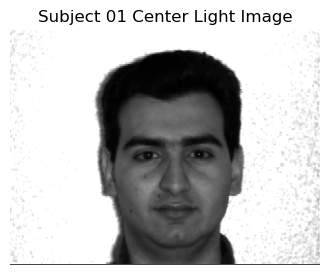

In [16]:
image_path = r'D:\Python kod\Data-Driven Science\DATA\yalefaces\subject15.centerlight'

pixels = load_image(image_path)

plt.figure(figsize=(4, 4))
plt.imshow(pixels, cmap='gray')
plt.axis('off')
plt.title('Subject 01 Center Light Image')
plt.show()

In [17]:
# 0 is woman and 1 is man
manual_uncropped = [[1,1],[2,1],[3,1],[4,1],[5,1],[6,1],[7,1],[8,1],[9,1],[10,1],[11,0],[12,1],[13,1],[14,1],[15,1]]
lookup_dict = dict(manual_uncropped)

uncropped_gender_classification_y = [lookup_dict.get(value, None) for value in uncropped_face_classification_y]

In [18]:
import scipy as sp

mat_contents = sp.io.loadmat(os.path.join("..","DATA","allFaces.mat"))
image_cropped_matrix = mat_contents['faces']
print(image_cropped_matrix.shape)

(32256, 2410)


In [19]:
mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Sep  4 19:53:55 2014',
 '__version__': '1.0',
 '__globals__': [],
 'faces': array([[80, 94, 59, ...,  3,  4,  4],
        [81, 87, 67, ...,  4,  4,  3],
        [80, 88, 66, ...,  2,  4,  4],
        ...,
        [14,  7,  6, ...,  0,  1,  1],
        [14,  9,  6, ...,  1,  1,  0],
        [11,  8,  7, ...,  1,  1,  2]], dtype=uint8),
 'n': array([[192]], dtype=uint8),
 'm': array([[168]], dtype=uint8),
 'sub': array([[(array([[39]], dtype=uint8), array([[70, 84, 88, ...,  3,  4,  4],
                [74, 83, 95, ...,  4,  4,  3],
                [69, 82, 97, ...,  2,  4,  4],
                ...,
                [ 1,  2,  3, ...,  0,  1,  1],
                [ 1,  3,  3, ...,  1,  1,  0],
                [ 2,  2,  3, ...,  1,  1,  2]], dtype=uint8), array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          

In [20]:
cropped_face_classification_y = []
idx = 1
for i in mat_contents['nfaces'][0]:
    cropped_face_classification_y+=[idx]*i
    idx+=1

In [21]:
# 0 is woman and 1 is man
manual_cropped = [[1,1],[2,1],[3,1],[4,1],[5,0],[6,1],[7,1],[8,1],[9,1],[10,1],[11,1],[12,1],[13,1],
                  [14,0],[15,0],[16,1],[17,1],[18,1],[19,1],[20,1],[21,1],[22,1],[23,1],[24,1],[25,1],[26,0],[27,0],
                  [28,1],[29,1],[30,1],[31,0],[32,1],[33,0],[34,1],[35,1],[36,0],[37,1],[38,1]]
lookup_dict = dict(manual_cropped)

cropped_gender_classification_y = [lookup_dict.get(value, None) for value in cropped_face_classification_y]

## a)

In [22]:
U_uncropped, S_uncropped, Vt_uncropped = np.linalg.svd(image_uncropped_matrix, full_matrices=False)
U_cropped, S_cropped, Vt_cropped = np.linalg.svd(image_cropped_matrix, full_matrices=False)

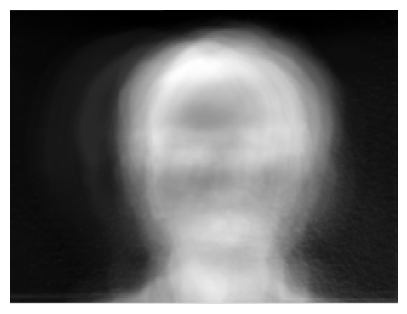

In [23]:
uncropped_eigen_face = np.reshape(U_uncropped[:, 0],(width, height))
plt.figure(figsize=(5, 5))
plt.imshow(uncropped_eigen_face, cmap='gray')
plt.axis('off')
plt.show()

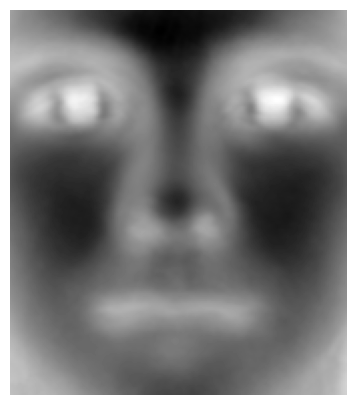

In [24]:
cropped_eigen_face = np.reshape(U_cropped[:, 0],(int(mat_contents['m']), int(mat_contents['n']))).T
plt.figure(figsize=(5, 5))
plt.imshow(cropped_eigen_face, cmap='gray')
plt.axis('off')
plt.show()

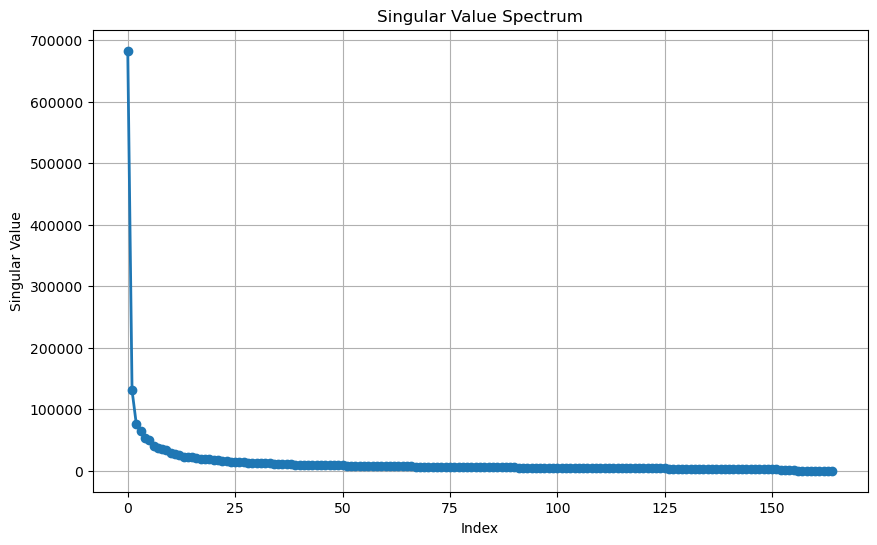

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(S_uncropped, 'o-', linewidth=2)
plt.title('Singular Value Spectrum')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()

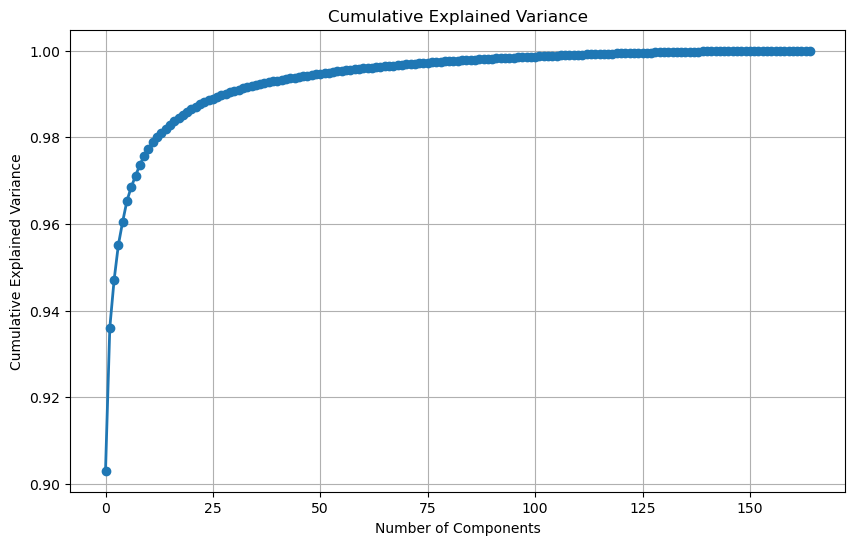

In [26]:
# Calculate explained variance
explained_variance = (S_uncropped ** 2) / np.sum(S_uncropped ** 2)
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, 'o-', linewidth=2)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

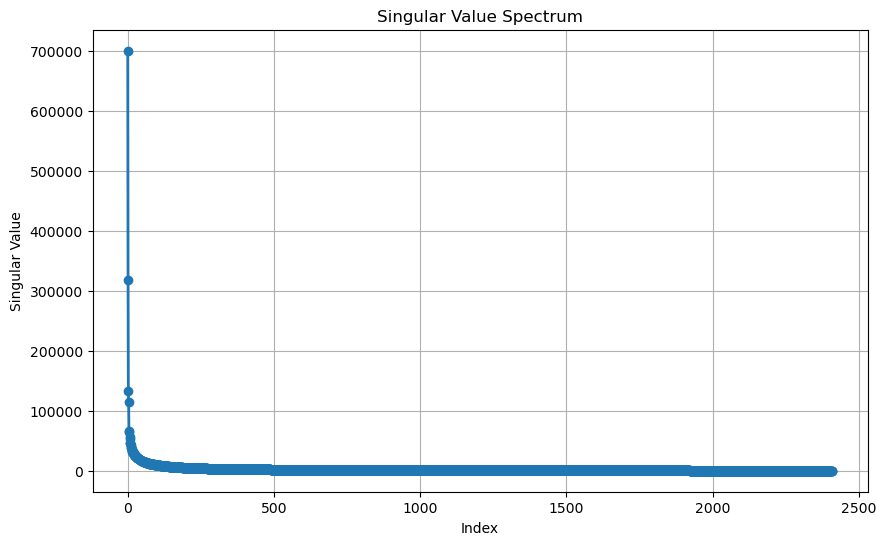

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(S_cropped, 'o-', linewidth=2)
plt.title('Singular Value Spectrum')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()

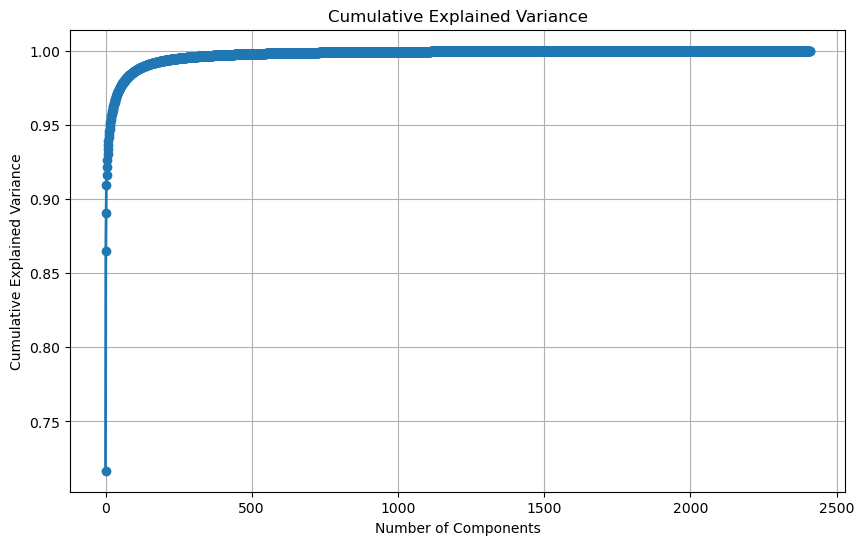

In [28]:
# Calculate explained variance
explained_variance = (S_cropped ** 2) / np.sum(S_cropped ** 2)
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, 'o-', linewidth=2)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

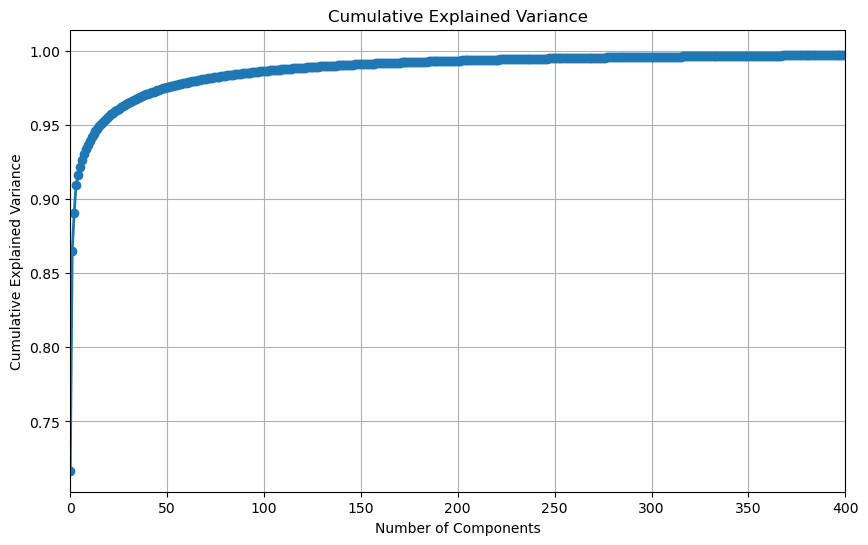

In [29]:
# Calculate explained variance
explained_variance = (S_cropped ** 2) / np.sum(S_cropped ** 2)
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, 'o-', linewidth=2)
plt.xlim(0, 400)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

## b)
U Matrix (Left Singular Vectors): Each column of  U represents an eigenface, which is a basis image capturing patterns that are common across the faces. These eigenfaces form an orthonormal basis for the face space.

Σ Matrix (Singular Values): The diagonal matrix Σ contains singular values that indicate the amount of variance captured by each eigenface. Larger singular values correspond to eigenfaces that capture more significant features.

V Matrix (Right Singular Vectors): Each column of  V represents the coefficients (weights) for a particular image in terms of the eigenfaces. It shows how much each eigenface contributes to reconstructing an individual image.

## c), d)

For the uncropped version one mode captures ~90% of the variance. Close to all varianve is captured by approximatly 100 modes.
For the cropped version, around 4 modes capture close to 90% of the variance. Close to all variance is captured by approximately 300 modes.

The uncropped version contain alot of "dead space" which is not relevant for the face recognition. This is the reason why the cropped version can capture the variance with fewer modes. The uncropped dataset is also much smaller than the cropped dataset.

## e)

In [30]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

# Encode the labels
#label_encoder = OneHotEncoder(sparse_output=False)
label_encoder_uncropped = LabelEncoder()
label_encoder_cropped = LabelEncoder()
y_uncropped = label_encoder_uncropped.fit_transform(np.array(uncropped_face_classification_y))
y_cropped = label_encoder_cropped.fit_transform(np.array(cropped_face_classification_y))

X_train_uncropped, X_test_uncropped, y_train_uncropped, y_test_uncropped = train_test_split(
    image_uncropped_matrix.T, y_uncropped, test_size=0.3, random_state=42
)

X_train_cropped, X_test_cropped, y_train_cropped, y_test_cropped = train_test_split(
    image_cropped_matrix.T, y_cropped, test_size=0.3, random_state=42
)

In [31]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score

classifiers = {
    'SVM': SVC(kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

target_names_uncropped = list(map(str, label_encoder_uncropped.classes_))
target_names_cropped = list(map(str, label_encoder_cropped.classes_))

print('Uncropped')
for name, clf in classifiers.items():
    clf.fit(X_train_uncropped, y_train_uncropped)
    y_pred = clf.predict(X_test_uncropped)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test_uncropped, y_pred, target_names=target_names_uncropped))
    print(f"{name} Accuracy: {accuracy_score(y_test_uncropped, y_pred):.2f}")
    print('\n')

Uncropped

SVM Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         6
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       0.25      0.50      0.33         4
           8       1.00      1.00      1.00         4
           9       0.75      0.75      0.75         4
          10       0.50      1.00      0.67         2
          11       1.00      1.00      1.00         2
          12       0.50      1.00      0.67         2
          13       1.00      0.67      0.80         6
          14       1.00      1.00      1.00         2
          15       0.60      0.75      0.67         4

    accuracy                           0.74        50
   macro avg       0.77      0.81      0.7

c:\Users\Robin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Robin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Robin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



LDA Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       0.80      1.00      0.89         4
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       0.67      1.00      0.80         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         2
          15       1.00      0.75      0.86         4

    accuracy                           0.96        50
   macro avg       0.96      0.95      0.95        5

In [32]:
print('Cropped')
for name, clf in classifiers.items():
    clf.fit(X_train_cropped, y_train_cropped)
    y_pred = clf.predict(X_test_cropped)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test_cropped, y_pred, target_names=target_names_cropped))
    print(f"{name} Accuracy: {accuracy_score(y_test_cropped, y_pred):.2f}")
    print('\n')

Cropped

SVM Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       1.00      0.71      0.83        21
           3       0.80      0.75      0.77        16
           4       0.85      0.88      0.86        25
           5       1.00      0.77      0.87        26
           6       0.79      0.94      0.86        16
           7       1.00      0.48      0.65        25
           8       0.88      0.75      0.81        20
           9       1.00      0.88      0.93        24
          10       1.00      0.70      0.82        20
          11       0.88      0.79      0.83        19
          12       0.91      0.91      0.91        11
          13       1.00      0.83      0.91        18
          14       0.89      0.94      0.92        18
          15       0.94      0.79      0.86        19
          16       0.58      0.79      0.67        14
          17       1.00      0.94      0.97  

For the uncropped version, the LDA classifier achieves an accuracy of approximately 0.95, indicating excellent performance in identifying individual faces.

For the cropped version a random forest classifier achieves an accuracy of approximately 0.99, indicating excellent performance in identifying individual faces, but the LDA is not far behind with an accuracy of 0.97.

## f)

In [33]:
label_encoder_uncropped = LabelEncoder()
label_encoder_cropped = LabelEncoder()
y_uncropped = label_encoder_uncropped.fit_transform(np.array(uncropped_gender_classification_y))
y_cropped = label_encoder_cropped.fit_transform(np.array(cropped_gender_classification_y))

X_train_uncropped, X_test_uncropped, y_train_uncropped, y_test_uncropped = train_test_split(
    image_uncropped_matrix.T, y_uncropped, test_size=0.3, random_state=42
)

X_train_cropped, X_test_cropped, y_train_cropped, y_test_cropped = train_test_split(
    image_cropped_matrix.T, y_cropped, test_size=0.3, random_state=42
)

In [34]:
target_names_uncropped = list(map(str, label_encoder_uncropped.classes_))
target_names_cropped = list(map(str, label_encoder_cropped.classes_))

print('Uncropped')
for name, clf in classifiers.items():
    clf.fit(X_train_uncropped, y_train_uncropped)
    y_pred = clf.predict(X_test_uncropped)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test_uncropped, y_pred, target_names=target_names_uncropped))
    print(f"{name} Accuracy: {accuracy_score(y_test_uncropped, y_pred):.2f}")
    print('\n')

Uncropped

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        48

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

SVM Accuracy: 1.00



KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        48

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

KNN Accuracy: 1.00



LDA Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        48

    accuracy                           1.00   

In [35]:
print('Cropped')
for name, clf in classifiers.items():
    clf.fit(X_train_cropped, y_train_cropped)
    y_pred = clf.predict(X_test_cropped)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test_cropped, y_pred, target_names=target_names_cropped))
    print(f"{name} Accuracy: {accuracy_score(y_test_cropped, y_pred):.2f}")
    print('\n')

Cropped

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.73      0.84       145
           1       0.94      1.00      0.97       578

    accuracy                           0.95       723
   macro avg       0.97      0.87      0.91       723
weighted avg       0.95      0.95      0.94       723

SVM Accuracy: 0.95



KNN Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.66      0.75       145
           1       0.92      0.98      0.95       578

    accuracy                           0.91       723
   macro avg       0.90      0.82      0.85       723
weighted avg       0.91      0.91      0.91       723

KNN Accuracy: 0.91



LDA Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       145
           1       0.98      0.98      0.98       578

    accuracy                           0.97     

For both the uncropped and cropped versions all classifiers achieve a high accuracy. I think this is because there are so few females in the dataset compared to males.

## g)

In [36]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Reduce dimensionality with PCA for clustering
pca = PCA(n_components=100, whiten=True)
X_pca = pca.fit_transform(image_uncropped_matrix.T)

# Apply K-Means clustering
num_clusters = len(np.unique(uncropped_face_classification_y))
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

c:\Users\Robin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
ari_score = adjusted_rand_score(uncropped_face_classification_y, clusters)
print(f"Adjusted Rand Index for K-Means Clustering: {ari_score:.2f}")

Adjusted Rand Index for K-Means Clustering: 0.02


In [38]:
# Reduce dimensionality with PCA for clustering
pca = PCA(n_components=100, whiten=True)
X_pca = pca.fit_transform(image_cropped_matrix.T)

# Apply K-Means clustering
num_clusters = len(np.unique(cropped_face_classification_y))
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

c:\Users\Robin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [39]:
ari_score = adjusted_rand_score(cropped_face_classification_y, clusters)
print(f"Adjusted Rand Index for K-Means Clustering: {ari_score:.2f}")

Adjusted Rand Index for K-Means Clustering: 0.16


Range: ARI ranges from -1 to 1, where 1 indicates perfect clustering agreement, 0 indicates clustering results no better than random, and negative values indicate worse than random clustering.

So for the uncropped version the KMeans algorithm achieves an ARI of 0.03, indicating that the clustering results are not better than random. For the cropped version the KMeans algorithm achieves an ARI of 0.21, indicating that the clustering results are better than random.